C:\Users\user\AppData\Local\Temp\ipykernel_2064\468497615.py:12: DeprecationWarning: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.21.0`. Use `Detections.from_inference` instead.
  detections = sv.Detections.from_roboflow(results[0].dict(by_alias=True, exclude_none=True))


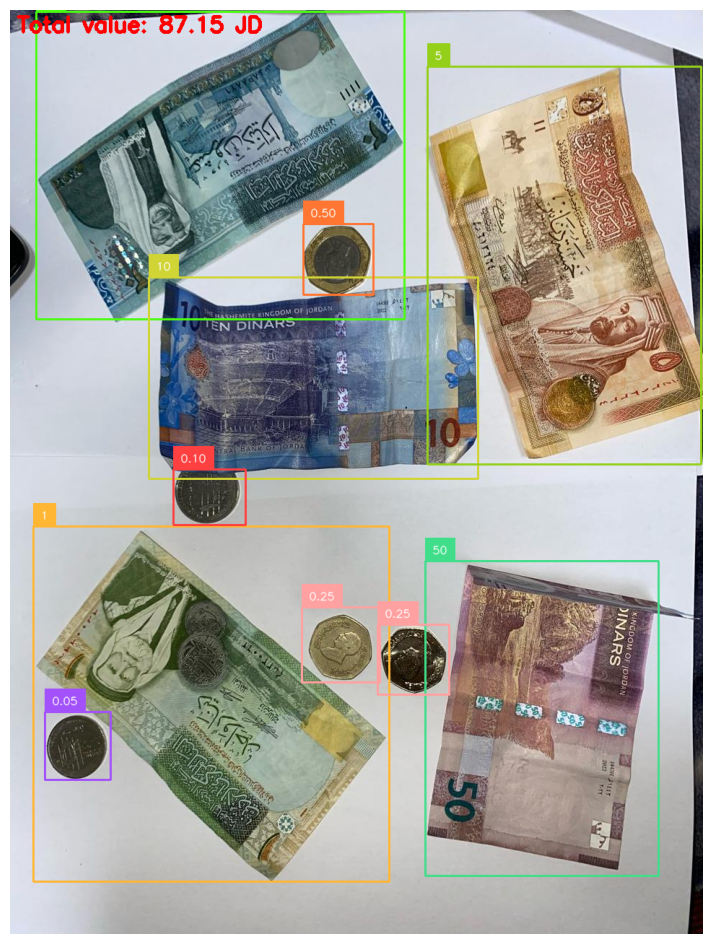

Number of coins detected:  10
Total value of coins: $ 87.14999999999999


In [4]:
from inference import get_roboflow_model
import supervision as sv
import cv2

image = cv2.imread("C://Users//user//Desktop//Test//img.jpg")

model = get_roboflow_model(model_id="jd-coins-detect/4", api_key="P9FIdsEXMWwbiuhPGd7g")

results = model.infer(image)

labels = [i.class_name for i in results[0].predictions]
detections = sv.Detections.from_roboflow(results[0].dict(by_alias=True, exclude_none=True))

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

# Draw total value on the annotated image with red color
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 4
font_color = (0, 0, 255)  # Red color

# Calculate total value
coin_values = {
    "0.05": 0.05,
    "0.10": 0.10,
    "0.25": 0.25,
    "0.50": 0.50,
    "1": 1,
    "5": 5,
    "10": 10,
    "20": 20,
    "50": 50,
    # Add more labels and their corresponding values as needed
}
total_value = sum(coin_values.get(label, 0) for label in labels)

# Convert total value to string and append it to the image
total_value_str = f"Total value: {total_value:.2f} JD"
cv2.putText(annotated_image, total_value_str, (10, 30), font, font_scale, font_color, font_thickness)

sv.plot_image(annotated_image)

print("Number of coins detected: ", len(detections))
print("Total value of coins: $", total_value)


In [1]:
from inference import get_roboflow_model
import supervision as sv
import cv2
import time

# Function to process video frames
def process_video_frame(frame, model, coin_values):
    results = model.infer(frame)

    labels = [i.class_name for i in results[0].predictions]
    detections = sv.Detections.from_roboflow(results[0].dict(by_alias=True, exclude_none=True))

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_frame = bounding_box_annotator.annotate(
        scene=frame, detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)

    # Draw total value on the annotated frame with red color
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 4
    font_color = (0, 0, 255)  # Red color

    # Calculate total value
    total_value = sum(coin_values.get(label, 0) for label in labels)

    # Convert total value to string and append it to the frame
    total_value_str = f"Total value: {total_value:.2f} JD"
    cv2.putText(annotated_frame, total_value_str, (10, 30), font, font_scale, font_color, font_thickness)

    return annotated_frame, len(detections), total_value

# Open video capture
video_capture = cv2.VideoCapture("C://Users//user//Desktop//Test//VID-20240218-WA0001.mp4")  # Replace with your video file

# Load the model
model = get_roboflow_model(model_id="jd-coins-detect/4", api_key="P9FIdsEXMWwbiuhPGd7g")

# Define coin values
coin_values = {
    "0.05": 0.05,
    "0.10": 0.10,
    "0.25": 0.25,
    "0.50": 0.50,
    "1.0": 1,
    "1": 1,
    "5": 5,
    "10": 10,
    "20": 20,
    "50": 50,
    # Add more labels and their corresponding values as needed
}

# Set the desired frame rate
desired_frame_rate = 10000
frame_delay = 1 / desired_frame_rate

# Initialize variables for FPS calculation
start_time = time.time()
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = video_capture.read()

    if not ret:
        break  # Break the loop if the video ends

    # Process the frame
    annotated_frame, num_coins, total_value = process_video_frame(frame, model, coin_values)

    # Calculate FPS
    frame_count += 1
    elapsed_time = time.time() - start_time
    fps = frame_count / elapsed_time

    # Overlay FPS on the frame
    font_fps = cv2.FONT_HERSHEY_SIMPLEX
    font_scale_fps = 0.8
    font_thickness_fps = 2
    font_color_fps = (255, 255, 255)  # White color

    fps_str = f"FPS: {fps:.2f}"
    cv2.putText(annotated_frame, fps_str, (10, 60), font_fps, font_scale_fps, font_color_fps, font_thickness_fps)

    # Display the annotated frame
    cv2.imshow('Video', annotated_frame)

    # Introduce a delay to achieve the desired frame rate
    time.sleep(frame_delay)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
video_capture.release()
cv2.destroyAllWindows()

print("Video processing complete.")


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_16884\3202470824.py:11: DeprecationWarning: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.21.0`. Use `Detections.from_inference` instead.
  detections = sv.Detections.from_roboflow(results[0].dict(by_alias=True, exclude_none=True))


Video processing complete.
